In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from numpy import exp
from IPython.display import HTML
from matplotlib.colors import ListedColormap


## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.ajmarkwick.net/">Dr. Andrew Markwick</a> - Twitter <a href="https://twitter.com/AndrewMarkwick">@AndrewMarkwick</a><br>
            <a href="www.oms-lab.org">Dr. Patrick Parkinson</a>
        </div>
    </div>
</div>

# Chapter 11

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. Limit setting
11. **Introduction to multivariate analysis techniques**

## Topics

**[11 Multi-variate analyses](#11-Multi-variate-analyses)**

**[11.1 Introduction](#11.1-Introduction)**

**[11.2 Receiver-Operating Characteristic curve](#11.2-Receiver-Operating-Characteristic-curve)**

**[11.3 Cross-validation](#11.3-Cross-validation)**

**[11.4 Multi-variate classification techniques](#11.4-Multi-variate-classification-techniques)**
- [11.4.1 k-Nearest Neighbour Classifier](#11.4.1-k-Nearest-Neighbour-Classifier)
- [11.4.2 Artificial Neural Networks](#11.4.2-Artificial-Neural-Networks)
- [11.4.3 (Boosted) Decision Trees](#11.4.3-(Boosted)-Decision-Trees)

## 11 Multi-variate analyses


### 11.1 Introduction

This part of the lecture follows chapter 5 of Behnke, written by Helge Voss. Some of the code examples are taken from <a href="http://www.scipy-lectures.org">www.scipy-lectures.org</a>, which is a rich resource of examples with decent explanation in all aspects of scientific python from simple maths to machine learning.

The topic can easily fill a whole lecture course; hence, we have to be rather selective and to some extent superficial here.

There are two topics that are covered by multi-variate analyses: classification and regression. We will concentrate here on the former.

Classification covers the distinction of two or more classes of items in those of interest and those that are not.

The term multi-variate refers to the fact that we consider the information from several variables of interest, often called _features_ in this context, rather than just analysing a single observable. The multi-variate analysis then transforms this set of variables into a single output variable. Let us call the input set ${\bf x}=\{x_1,\ldots,x_D\}$, also referred to as the _feature vector_, and correspondingly the output $y({\bf x})$.

You can think back to the Martian rock classification as an example. There, we discussed the classification based on a single oxide concentration. Within the context of this chapter, we can extend this to the joint analysis of all measured concentrations.

#### 11.1.1 Linking classification to previous topics

Classification can be interpreted as a hypothesis test. In this case the null hypothesis, $H_0$, is that the item to classify is not of interest. Depending on the value of the test statistic $y({\bf x})$ we then reject this hypothesis or not.

The performance of a multi-variate classifier is assessed by the rate of Type I and II errors, i.e. how often items are wrongly declared to be of interest (Type I error) or how often items are wrongly found to be not of interest (Type II error). As before the trade-off between these two rates depends on the application in question.

Let us call the items of interest signal ($S$) and those not of interest background ($B$). Their distinction is then linked to the test statistic exceeding a critical value in which case we accept the outcome as signal:

$$y({\bf x})>c.$$

We can consequently define a critical region $C$ in parameter space where this equation is satisfied. With this, the rate of Type I errors or the significance is

$$\alpha=\int_C p({\bf X}|H_0)d{\bf x} = \int_C p({\bf X}|B)d{\bf x} = \int_{y({\bf x})>c}p({\bf X}|B)d{\bf x}.$$

This also defines the rate of Type II errors as

$$\beta=\int_{y({\bf x})<c}p({\bf X}|S)d{\bf x}.$$

In this context, we can also identify $1-\beta$, which is usually called power, as the signal efficiency, and $1-\alpha$ as the background rejection.

Rather than considering the complicated observable space in which we have a hyper-surface called decision boundary, defined by $y({\bf x})=c$, we can also consider the classifier output, which leads to

$$\int_{c}^\infty p(y|B)dy=\alpha,$$

and

$$\int_{-\infty}^{c} p(y|S)dy = \beta.$$

A graphical example is given below in 12.2.

Following Bayes, we can calculate the rate of signal decisions if we know the overall fraction of signal ($f_S$) and background ($f_B$) items as

$$P_S(y)\equiv P(S|y)=\frac{p(y|S)f_S}{p(y|S)f_S+p(y|B)(1-f_S)}.$$

#### 11.1.2 Machine Learning

The term _machine learning_ simply describes the automatic determination of the possible decision boundaries of a classifier, i.e. it determines the function $y({\bf x})$ that transforms the feature vector into a single output quantity. 

The term _supervised learning_ refers to the usage of a training dataset for which the true classification is known.
_Unsupervised learning_ performs classification without being instructed which characteristics to pick out and is typically used in cluster finding or self-organising maps.

A classical example is the Iris, which a genus of 260-300 species of flowering plants. Some of the Iris varieties look very similar (see below) but have subtle differences when it come to the length and width of their petals for instance.

<img src="images/iris.png" width=80%>

#### 11.1.3 Bias-variance trade-off

When training a multi-variate classifier the configuration of the algorithm determines the number of degrees of freedom and through these the ability of the classifier to pick out small-scale features of the training dataset.

A classifier with few degrees of freedom will lead to very similar results when trained on statistically independent datasets that all are drawn from the same underlying distribution. This is called small _variance_. At the same time, the result will lead to a deviation from the individual dataset as it would not pick out the most fine-grained features; this is called the _bias_ of the classifier.

Conversely, when the classifier is given many degrees of freedom, it will have a smaller bias at the expense of a larger variance.  The balancing of these different criteria is called bias-variance trade-off.

At the point when it starts to pick out statistical fluctuations of the training set it is called _overtrained_.
One way to avoid this is to exploit several datasets that all represent the same underlying distributions. They can for example all be randomly drawn subsets of one bigger sample. The first is called _training dataset_ and is used for the initial round of machine learning. A second set, the _validation dataset_ is used to evaluate the classifier. The training is performed with increasing complexity (i.e. number of degrees of freedom of the algorithm), which should lead to improving signal-background separation. So long as this separation is confirmed by the validation sample all is good. Once the validation sample no longer shows the same improvement of the training sample, the point of overtraining has been reached. Finally, the classifier is applied to a third sample, the test sample.

<img src="images/Overfitting.png" width=40%>
(Source: [Chabacano](https://commons.wikimedia.org/wiki/User:Chabacano), [Overfitting](https://commons.wikimedia.org/wiki/File:Overfitting.svg), [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/legalcode))

### 11.2 Receiver-Operator Characteristic curve

As discussed before, the optimal working point of Type I/II errors or signal efficiency and background rejection depends on the specific problem being analysed. It is instructive to illustrate the different options. The Receiver-Operating Characteristic (ROC) curve shows background rejection as a function of signal efficiency and is constructed by evaluating all possible critical values $c$. 

The ROC curve must always start at $(0,1)$, which corresponds to zero signal efficiency and $100\%$ background rejection, i.e. everything is rejected. The opposite end of the curve is at $(1,0)$, where everything is accepted, i.e. $100\%$ signal efficiency but zero background rejection.

The example below uses two hypothetical signal and background classifier output distributions and builds a ROC curve for these, including highlighting some example points.

The accepted region lies to the right of the threshold value.
The orange curve represents the signal distribution and the blue curve shows the background distribution.
The right-hand graph shows background rejection against signal efficiency, i.e. the ROC curve.

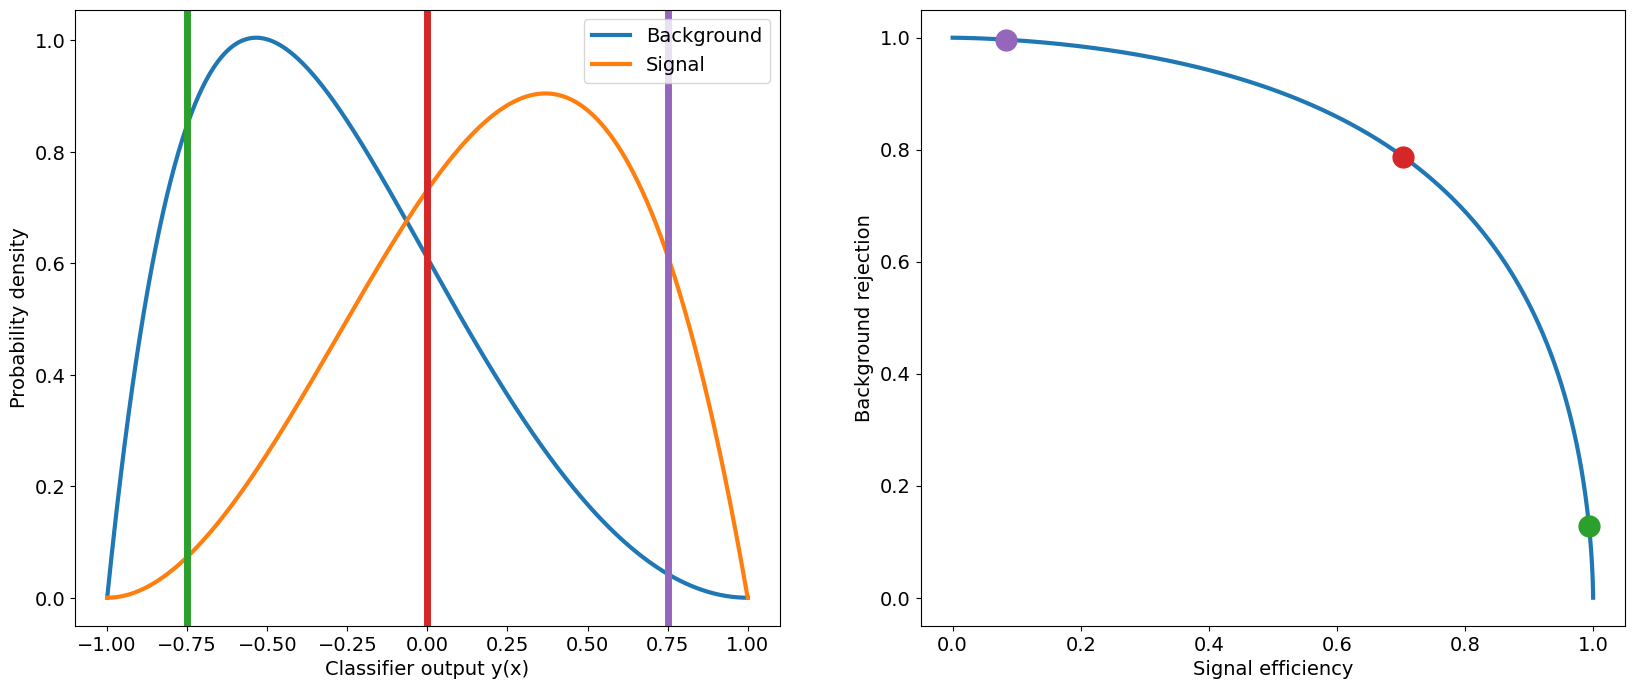

In [2]:
from typing import List
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt

# Define the range for classifier decision boundary
decision_min: float = -1.0
decision_max: float = 1.0

# Number of points for numerical integration
num_points: int = 1000
bin_width: float = (decision_max - decision_min) / num_points

# Create array of decision boundary values
decision_values: np.ndarray = np.linspace(decision_min, decision_max, num_points)

# Define probability density functions for signal and background
# These are example distributions representing classifier outputs
background_pdf: List[float] = [1./5.6793*(1-exp(-2*x-2))*(2*x-2)**2 for x in decision_values]
signal_pdf: List[float] = [1./0.3023*(1-exp(0.25*x-0.25))*(-x-1)**2 for x in decision_values]

# Calculate ROC curve points through numerical integration
# ROC shows relationship between signal efficiency and background rejection
signal_efficiency: List[float] = []
background_rejection: List[float] = []
cum_signal: float = 0.0
cum_background: float = 0.0

# Integrate PDFs to get cumulative distributions
for bkg, sig in zip(background_pdf, signal_pdf):
    cum_background += bkg * bin_width
    cum_signal += sig * bin_width
    # ROC points: (1 - cumulative signal) vs (cumulative background)
    signal_efficiency.append(1.0 - cum_signal)
    background_rejection.append(cum_background)

# Create two subplots: PDF distributions and ROC curve
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Classifier output distributions
ax[0].plot(decision_values, background_pdf, linewidth=3, label='Background')
ax[0].plot(decision_values, signal_pdf, linewidth=3, label='Signal')
ax[0].set_xlabel('Classifier output y(x)')
ax[0].set_ylabel('Probability density')
ax[0].legend()

# Plot 2: ROC curve
ax[1].plot(signal_efficiency, background_rejection, linewidth=3)
ax[1].set_xlabel('Signal efficiency')
ax[1].set_ylabel('Background rejection')

# Mark three example decision boundaries on both plots
example_points: List[int] = [int(num_points/8), int(num_points/2), int(7*num_points/8)]
for idx, point in enumerate(example_points):
    # Plot points on ROC curve
    eff = signal_efficiency[point]
    rej = background_rejection[point]
    ax[1].plot(eff, rej, 'o', c=f'C{idx+2}', markersize=15)
    
    # Show corresponding decision boundaries on PDF plot
    decision_value = decision_min + point * bin_width
    ax[0].axvline(x=decision_value, color=f'C{idx+2}', linewidth=5)

### 11.3 Cross-validation

Cross-validation describes a useful approach when the sample size is limited. It refers to a given dataset being split in e.g. ten subsets. If training and validation are carried out on four of the ten subsets each, they can exploit nearly all of the statistical power of the data. The classifier is then applied to the remaining two subsets.

The assignment of the ten subsets to the three samples, training, validation and test, are cycled through, such that (in this example) five classifier trainings have to be carried out. While this comes at some computational expense is has the advantage of making optimal use of the available data without having to sacrifice a subset for training and validation.

The plot below illustrates two scenarios of splitting a dataset into training, validation, and test datasets.

<img src="images/CrossValidation.png" width=60%>

#### Bootstrapping

Before diving into different concrete techniques, it is a good point to introduce a concept that is very powerful and widely used: bootstrapping.

One is often faced with datasets of limited size but the task of creating an ensemble of datasets to be used in the context of hypothesis testing (which includes classification).

Such ensembles can be created via bootstrapping in two different ways depending on the exact context:
- One can randomly draw a subset from the full dataset (i.e. by drawing with replacement) and repeat this multiple times. This generates different subsets; however, they are not completely statistically independent.
- In the context of classification one can randomly assign signal and background labels (or whatever categories apply) to a dataset and repeat this to generate multiple datasets with randomised labels.

Both variants can be used for example to create an ensemble of datasets to establish the distribution of a test statistic for a null hypothesis from.

### 11.4 Multi-variate classification techniques

In the following a few classification techniques are introduced. In the context of this lecture, this can only happen at a rather superficial level. Anyone interested in this is referred to the vast amount of literature available on this topic, which of course includes the two resources used for this lecture.

- Multi-variate classification techniques
   - k-Nearest Neighbour
   - Artificial Neural Networks
   - Boosted Decision Trees

##### Some input data

Data shape: (150, 4)
First sample measurements: [5.1 3.5 1.4 0.2]
Target shape: (150,)
Target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Species names: ['setosa' 'versicolor' 'virginica']


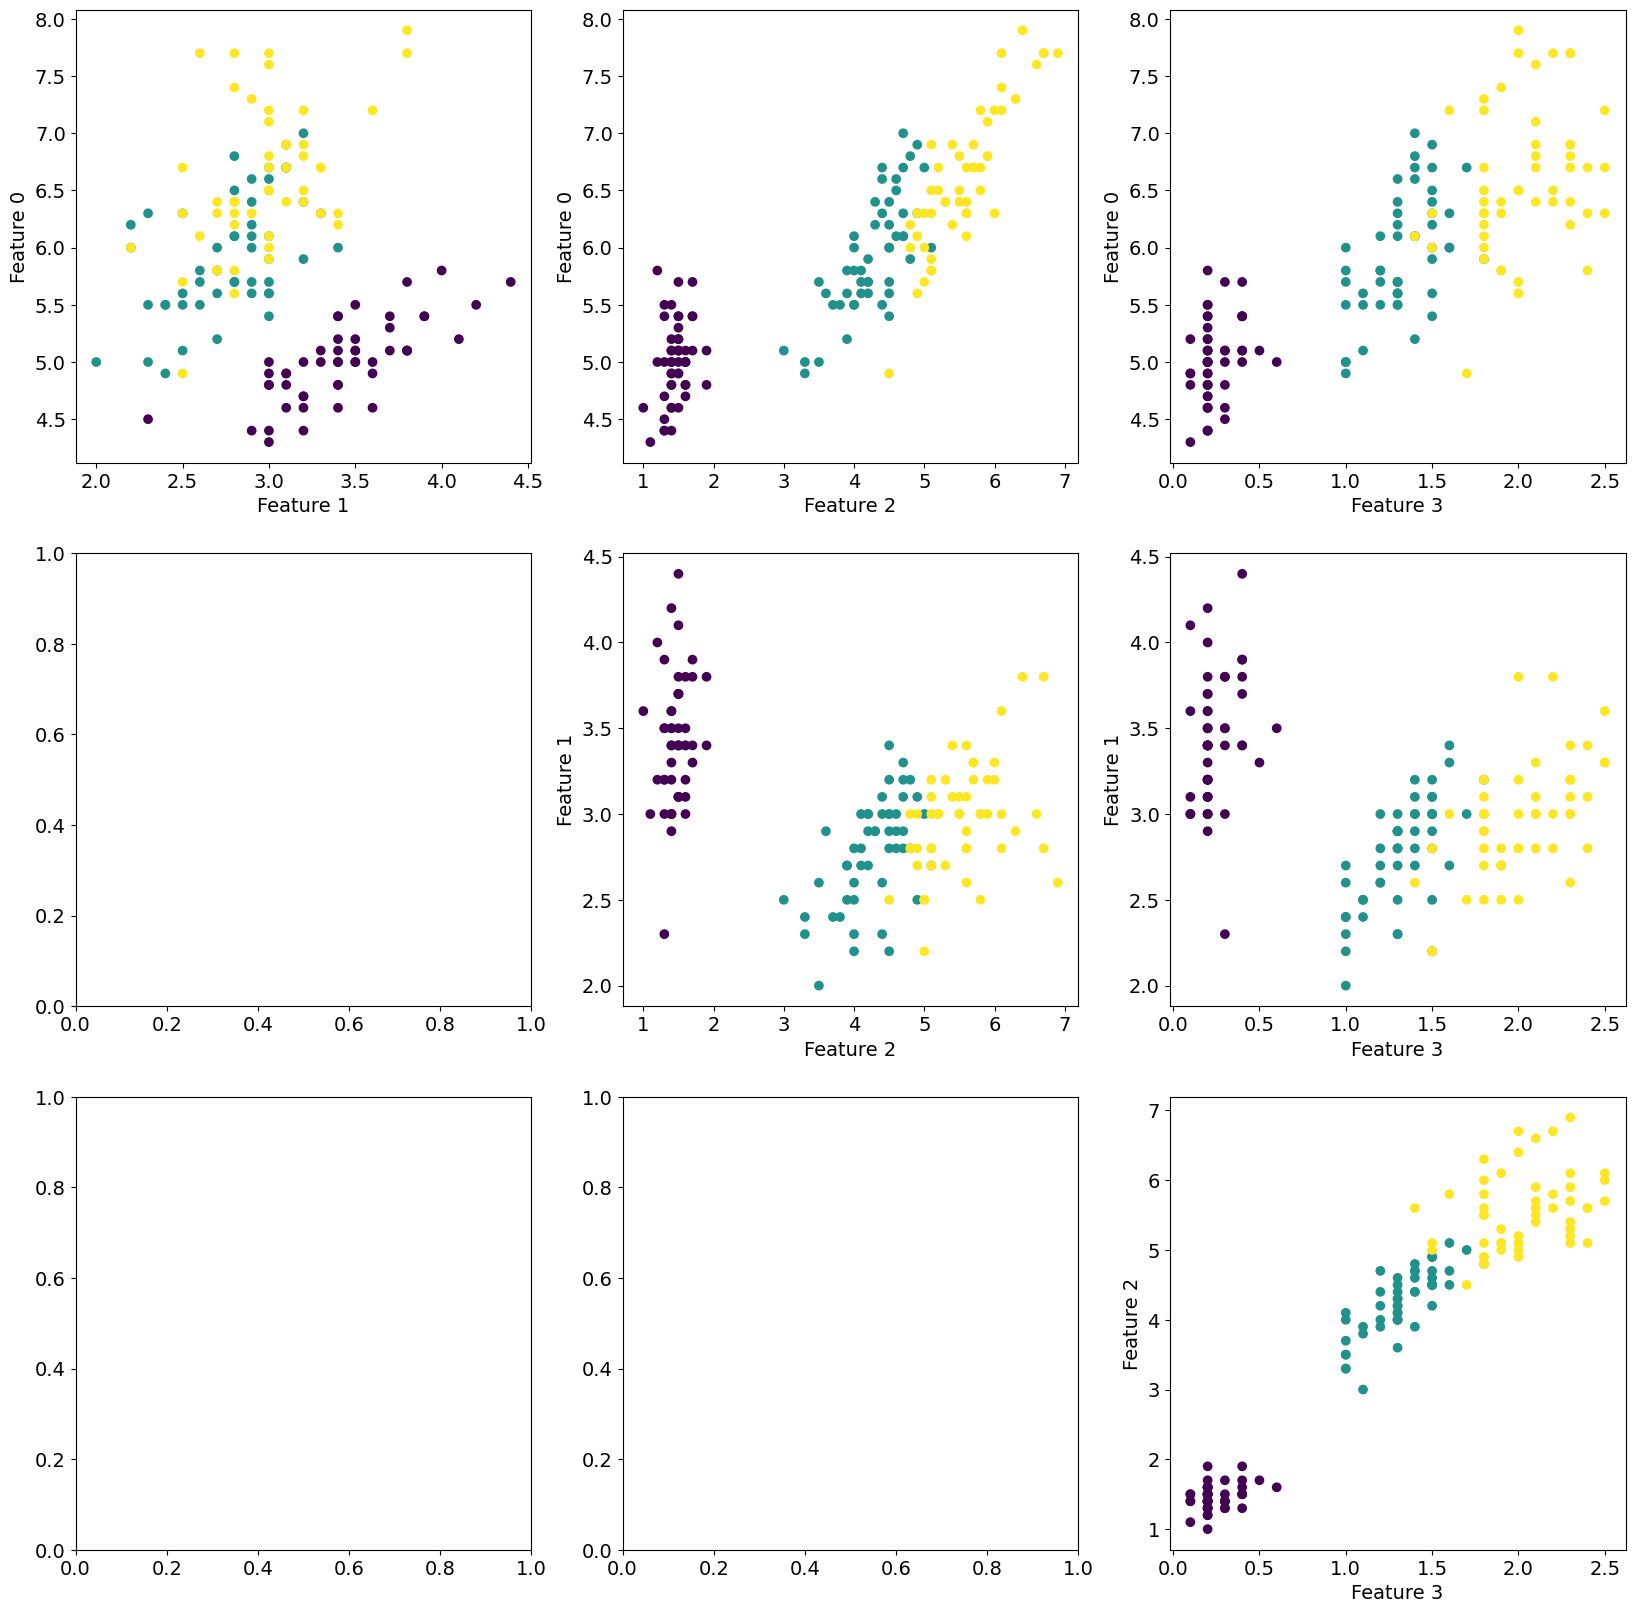

In [4]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import neighbors

# Load the classic Iris dataset (3 species of iris flowers)
iris_dataset = load_iris()

# Print basic information about the dataset
print(f"Data shape: {iris_dataset.data.shape}")  # (samples, features)
n_samples, n_features = iris_dataset.data.shape

# Display first sample's measurements and dataset structure
print(f"First sample measurements: {iris_dataset.data[0]}")
print(f"Target shape: {iris_dataset.target.shape}")  # One label per sample
print(f"Target labels: {iris_dataset.target}")  # Numerical labels (0, 1, 2)
print(f"Species names: {iris_dataset.target_names}")  # Actual species names

# Extract individual features (sepal length, sepal width, petal length, petal width)
iris_features: List[List[float]] = [
    [sample[i] for sample in iris_dataset.data] 
    for i in range(n_features)
]

# Create scatter plots comparing pairs of features
# This helps visualize how well features separate different classes
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

# Plot each feature against others (upper triangular matrix of plots)
for i in range(3):
    for j in range(i, 3):
        # Color points by their species (target)
        ax[i][j].scatter(
            iris_features[j+1],  # Feature on x-axis
            iris_features[i],    # Feature on y-axis
            marker='o',
            c=iris_dataset.target  # Color by species
        )
        # Label axes with feature numbers (1-based indexing for clarity)
        ax[i][j].set_xlabel(f'Feature {j+1}')
        ax[i][j].set_ylabel(f'Feature {i}')

plt.show()

#### 11.4.1 k-Nearest Neighbour Classifier

The power of multi-variate classifiers is that they can pick out features that are not obvious by looking at individual observables. This is where the "curse of dimensionality" enters as a small fraction of input phase space represents a large fraction of each variable. As an example, considering a ten-dimensional hypercube of size $1^{10}$, a sub-region that covers as much as half the length in each dimension covers about $0.1\%$ of the total volume.

The k-Nearest Neighbour (kNN) approach addresses this by counting the number of items of the same class (signal or background) in a hyper-sphere around the event in question. By counting up to a total of $k$ nearest neighbours, the method automatically scales the size of the volume that is investigated with the density of entries.

The local densities can then be approximated by the number of signal and background items found among the k nearest neighbours as

$$\frac{p({\bf x}|S)}{p({\bf x}|B)}\propto \frac{P(S|{\bf x})}{P(B|{\bf x})}\approx \frac{k_s({\bf x})}{k_b({\bf x})}.$$

Taking the numbers of signal and background events in the training sample, one can define the probability of a test event at the phase-space point ${\bf x}$ being of signal type:

$$P_s({\bf x})=\frac{k_s({\bf x})}{k_s({\bf x})+k_b({\bf x})}=\frac{k_s({\bf x})}{k({\bf x})}.$$

The example below shows four-dimensional data analysed by a kNN classifier. It shows one of the 2D projections and the classifier output for a range of values of $k$.

In [5]:
from sklearn import neighbors
from sklearn.datasets import load_iris
from typing import List

# Load the iris dataset - a common dataset for classification tasks
iris = load_iris()

# Create a K-Nearest Neighbors classifier
# n_neighbors=1 means we classify based on the single closest data point
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=1)

# Train the classifier using the iris features (data) and their labels (target)
knn_classifier.fit(X=iris.data, y=iris.target)

# Make a prediction for a new flower with these measurements:
# sepal length: 3cm, sepal width: 5cm, petal length: 4cm, petal width: 2cm
new_flower: List[float] = [[3, 5, 4, 2]]
prediction = knn_classifier.predict(new_flower)

# Convert numeric prediction to flower name and print result
predicted_species = iris.target_names[prediction]
print(f"Predicted iris species: {predicted_species}")

Predicted iris species: ['virginica']


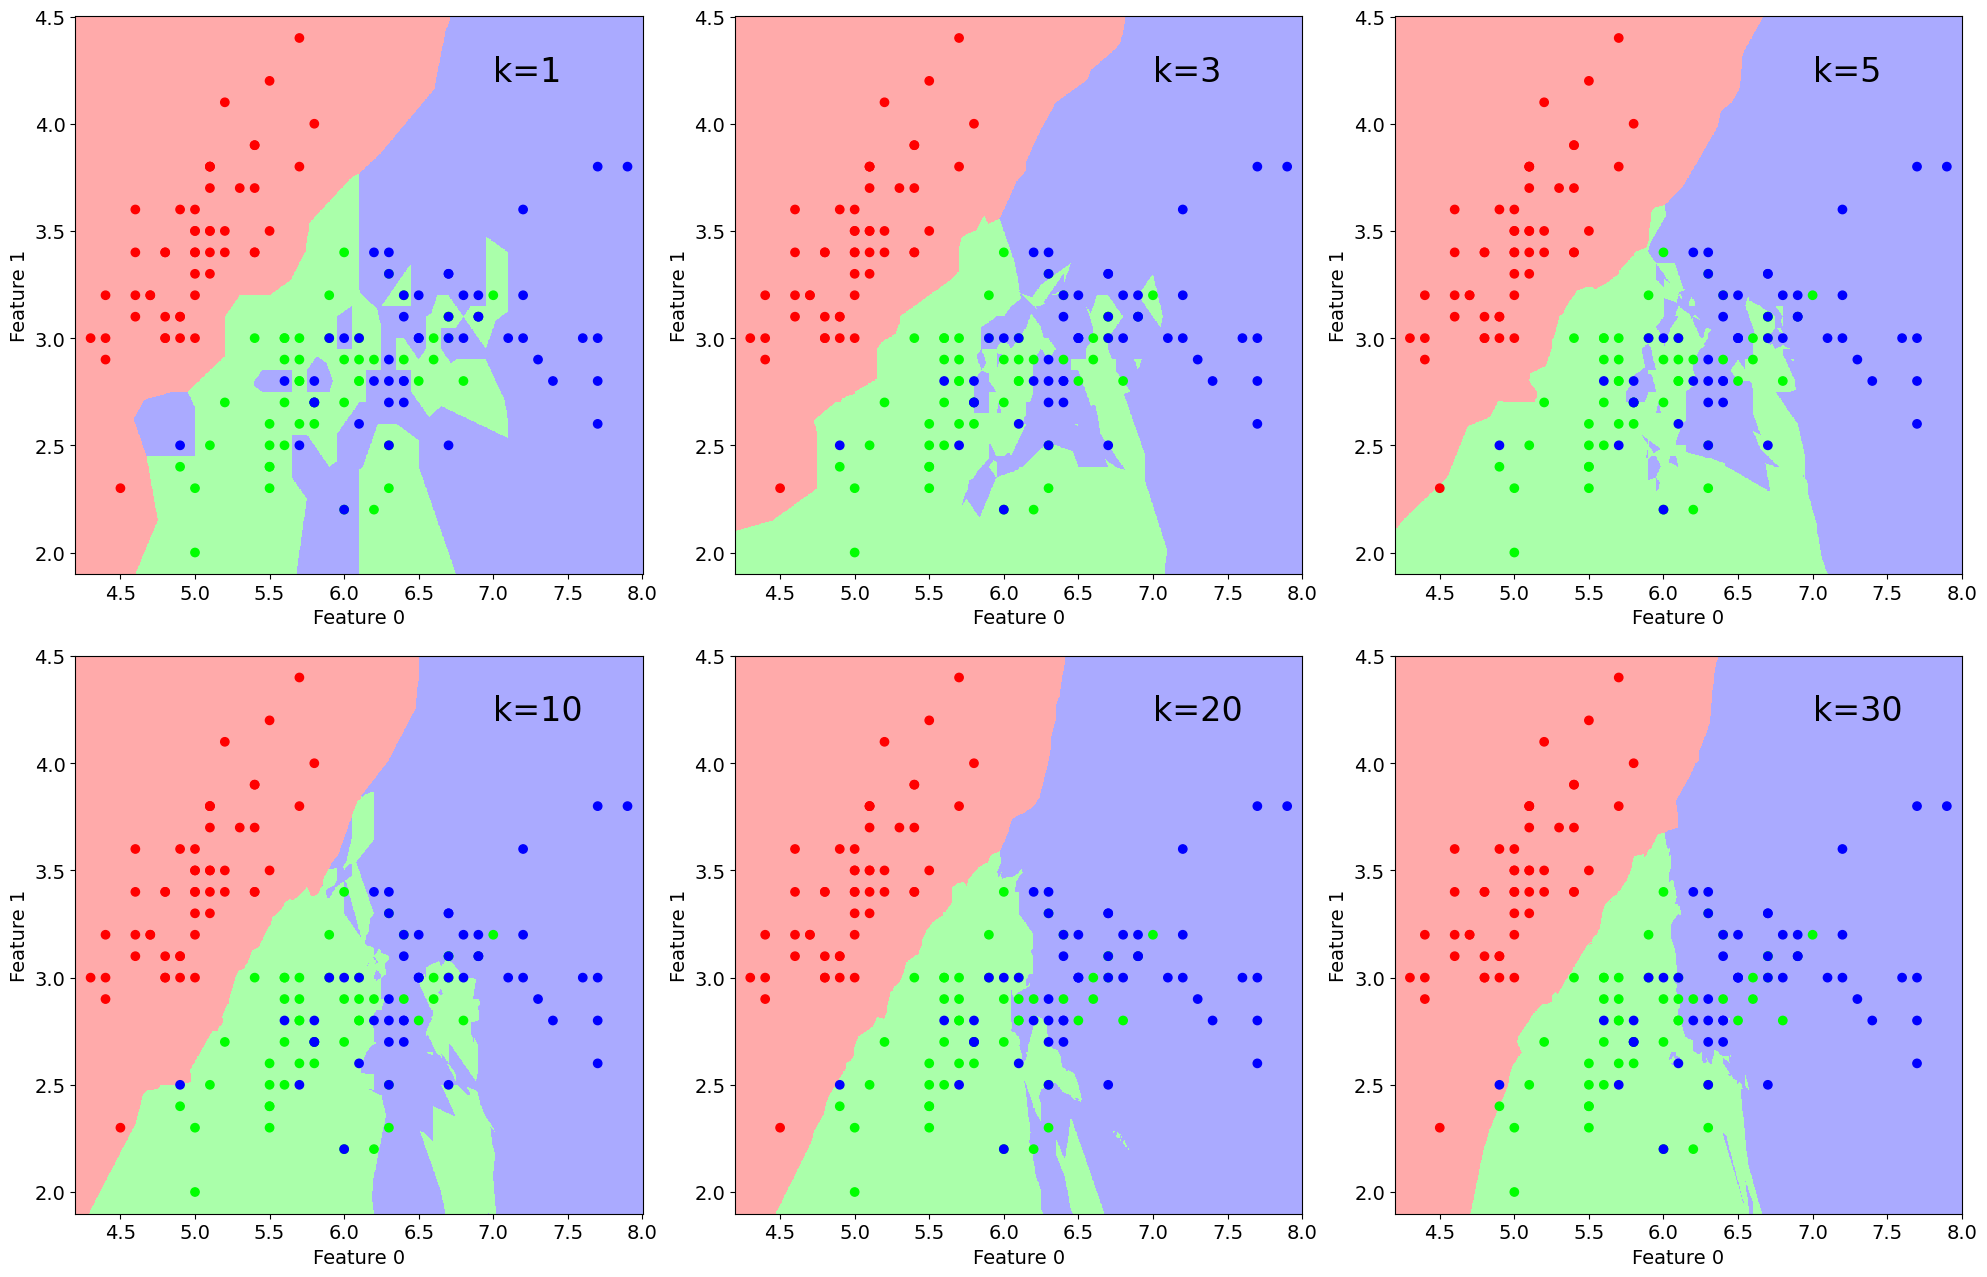

In [6]:
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_decision_boundaries(
    features: np.ndarray, 
    labels: np.ndarray,
    k_values: list[int] = [1, 3, 5, 10, 20, 30]
) -> None:
    """
    Visualize KNN classification decision boundaries for different k values.
    
    Args:
        features: Input features (first two dimensions only)
        labels: Target classifications
        k_values: List of k-nearest neighbors to test
    """
    # Define colors for visualization (one for each class)
    background_colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    point_colors = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Create subplot grid
    fig, axes = plt.subplots(2, 3, figsize=(20, 13))
    axes = axes.ravel()  # Flatten axes for easier iteration

    # Create mesh grid for decision boundary visualization
    x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 1000),
        np.linspace(y_min, y_max, 1000)
    )

    # Plot decision boundaries for each k value
    for idx, k in enumerate(k_values):
        # Initialize and train KNN classifier
        knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(features, labels)
        
        # Predict class labels for all points in mesh grid
        mesh_predictions = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        mesh_predictions = mesh_predictions.reshape(xx.shape)
        
        # Plot decision regions (background colors)
        axes[idx].pcolormesh(xx, yy, mesh_predictions, cmap=background_colors)
        
        # Plot training points
        axes[idx].scatter(
            features[:, 0], 
            features[:, 1], 
            c=labels, 
            cmap=point_colors
        )
        
        # Add labels and k value
        axes[idx].set_xlabel('Feature 0')
        axes[idx].set_ylabel('Feature 1')
        axes[idx].text(7, 4.2, f'k={k}', fontsize=24)

    plt.tight_layout()
    
# Load and prepare iris dataset
iris = datasets.load_iris()
iris_features = iris.data[:, :2]  # Use only first two features for visualization
iris_labels = iris.target

# Create visualization
plot_knn_decision_boundaries(iris_features, iris_labels)

##### Comments

We can see that taking into account more and more neighbours leads to smoother contours of the classification boundaries. The $k=1$ case almost certainly represents a severe case of overtraining as it picks out almost all of the features of the training sample.

For a full interpretation of the quality of the training, we would require a validation sample. Note that the plots above represent a 2D view of a 4D parameter space.

#### 11.4.2 Artificial Neural Networks

Artificial neural networks use the combination of an arbitrary number of functions to pick out features in the dataset. They are based on a linear mapping

$$y({\bf x})=w_0+\sum_{m=1}^M w_m \cdot h_m({\bf x}),$$

with weights $w_i$ and basis functions $h_m({\bf x})$.

It is more efficient to use a single function $h(t)$ for which functions like sigmoid, $h(t)=1/(1+e^{-t})$, turn out to be most useful as they are approximately linear for some variable range and constant otherwise. This means they select or "activate" a part of the variable range and are therefore called activation function.

In order to retain flexibility when using a single function, the variables undergo a linear transformation resulting in

$$y({\bf x})=w_0^2+\sum_{m=1}^M\left[w_m^2\cdot h\left( w_{0m}^1 + \sum_{k=1}^D w_{km}^1 x_k \right) \right].$$

The following plot shows the schematic layout of such a network with $D=4$ input variables and $M=5$ activation functions.

<img src="images/ANN.png" width=80%>

Several different structures of neural networks exist with increasingly complex structures, e.g. with more than one hidden layer.

#### 11.4.3 (Boosted) Decision Trees

Decision trees are based on a tree-like structure in which a decision is taken based on one variable and each of the outcomes then leads on to a decision being taken for the next variable, where the second level depends on the outcome of the first.

As a single decision tree offers limited flexibility, there are a number of concepts that increase complexity. One very widely used technique is boosting. This uses the output of several decision trees and computes a linear combination thereof to achieve a classifier output

$$y({\bf x};\alpha_0,\ldots,\alpha_M,{\bf a_0,\dots,a_M})=\sum_{m=0}^M \alpha_m b({\bf x; a_m}),$$

where ${\bf a_m}$ are the parameters of the individual trees and $\alpha_m$ are the boosting weights. There are different algorithms to optimise the boosting and train these classifiers.

<img src="images/random_forest.png" width=80%>
(Source: [Towards Digital Staining using Imaging Mass Spectrometry and Random Forests-Technical Report](https://www.researchgate.net/publication/228540194_Towards_Digital_Staining_using_Imaging_Mass_Spectrometry_and_Random_Forests-Technical_Report), Michael Hanselmann et al., 2009)

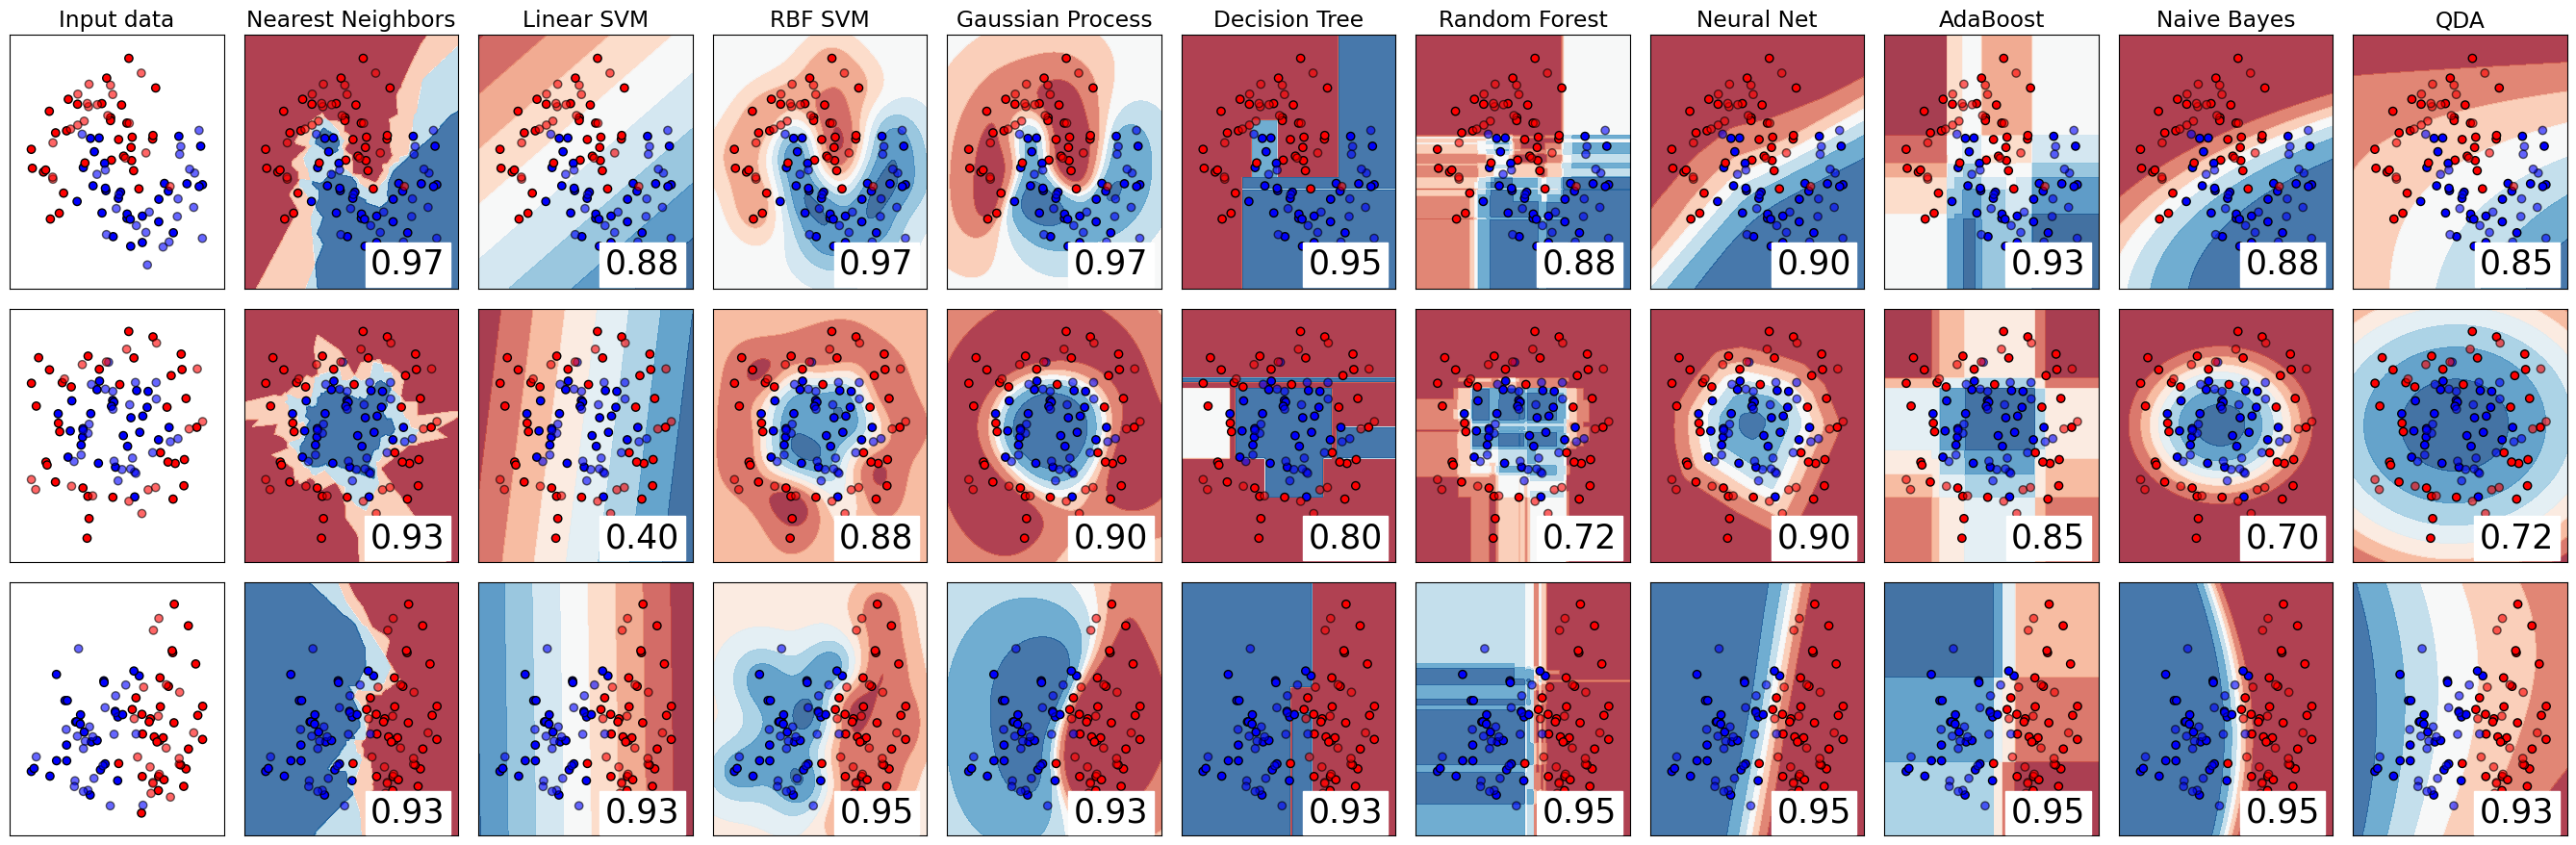

In [7]:
"""
Comparison of different classification algorithms on synthetic datasets.
This demonstrates how different classifiers perform on various data distributions.
"""

from typing import Tuple, List
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Grid resolution for plotting decision boundaries
MESH_STEP_SIZE: float = 0.02

# Define classifier names and their corresponding models
CLASSIFIER_NAMES: List[str] = [
    "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
    "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
    "Naive Bayes", "QDA"
]

# Initialize classifiers with their parameters
classifiers = [
    KNeighborsClassifier(n_neighbors=3),                    # Simple distance-based classifier
    SVC(kernel="linear", C=0.025),                         # Linear boundary
    SVC(gamma=2, C=1),                                     # Non-linear boundary
    GaussianProcessClassifier(1.0 * RBF(1.0)),            # Probabilistic classifier
    DecisionTreeClassifier(max_depth=5),                   # Tree-based decision rules
    RandomForestClassifier(max_depth=5, n_estimators=10),  # Ensemble of trees
    MLPClassifier(alpha=1, max_iter=500, activation='relu'), # Neural network
    AdaBoostClassifier(),                                  # Boosting ensemble
    GaussianNB(),                                          # Probabilistic classifier
    QuadraticDiscriminantAnalysis()                        # Quadratic boundary
]

# Generate synthetic datasets
def create_datasets() -> List[Tuple[np.ndarray, np.ndarray]]:
    """Create three different synthetic datasets for classification."""
    # Dataset 1: Two moons
    moons = make_moons(noise=0.3, random_state=0)
    
    # Dataset 2: Concentric circles
    circles = make_circles(noise=0.2, factor=0.5, random_state=1)
    
    # Dataset 3: Linearly separable data
    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             random_state=1, n_clusters_per_class=1)
    # Add random noise
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    
    return [moons, circles, (X, y)]

def plot_classification_results() -> None:
    """Plot the classification results for each dataset and classifier."""
    datasets = create_datasets()
    
    # Create figure
    fig = plt.figure(figsize=(27, 9))
    plot_idx = 1
    
    # Color maps for visualization
    color_map = plt.cm.RdBu
    color_map_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    # Iterate through datasets
    for dataset_idx, (X, y) in enumerate(datasets):
        # Standardize features
        X = StandardScaler().fit_transform(X)
        
        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=42
        )
        
        # Create mesh grid for plotting decision boundaries
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, MESH_STEP_SIZE),
            np.arange(y_min, y_max, MESH_STEP_SIZE)
        )
        
        # Plot input data
        ax = plt.subplot(len(datasets), len(classifiers) + 1, plot_idx)
        if dataset_idx == 0:
            ax.set_title("Input data")
            
        # Plot training and test points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=color_map_bright,
                  edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=color_map_bright,
                  alpha=0.6, edgecolors='k')
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        plot_idx += 1
        
        # Iterate through classifiers
        for name, clf in zip(CLASSIFIER_NAMES, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, plot_idx)
            
            # Train classifier
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            
            # Get decision boundary
            mesh_points = np.c_[xx.ravel(), yy.ravel()]
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(mesh_points)
            else:
                Z = clf.predict_proba(mesh_points)[:, 1]
            
            # Plot decision boundary
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=color_map, alpha=.8)
            
            # Plot data points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=color_map_bright,
                      edgecolors='k')
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=color_map_bright,
                      edgecolors='k', alpha=0.6)
            
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            
            if dataset_idx == 0:
                ax.set_title(name)
            
            # Show accuracy score
            ax.text(xx.max() - .3, yy.min() + .3, f'{score:.2f}',
                   size=25, horizontalalignment='right', 
                   color='black', backgroundcolor='white')
            plot_idx += 1

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_classification_results()

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>